In [1197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.3, palette="Set2")

In [1199]:
data = pd.read_csv("train.csv")
data

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838
...,...,...,...,...,...,...,...,...,...,...,...
7995,361,information_source,1468601.0,474524.0,0,61307,83928,16841,4.191481,0.017470,2023-06-20 19:48:01.783634440
7996,2621,information_source,93172.0,6418.0,0,3418,705,0,3.745192,-0.019069,2024-07-22 08:45:41.700070757
7997,2605,information_source,82916.0,0.0,0,4302,1718,1007,5.837475,-0.061523,2024-06-17 05:44:08.100200436
7998,1231,social,823896.0,105666.0,0,0,2892,267,11.994037,0.131620,2023-06-11 02:53:14.377302808


In [1201]:
data.shape, data.dtypes, data["complaints_count"].describe

((8000, 11),
 Unnamed: 0                 int64
 category                  object
 clicks                   float64
 likes                    float64
 buys                       int64
 4xx_errors                 int64
 5xx_errors                 int64
 complaints_count          object
 average_dwelltime        float64
 source_attractiveness    float64
 date_of_registration      object
 dtype: object,
 <bound method NDFrame.describe of 0           0
 1           0
 2           0
 3           0
 4        3948
         ...  
 7995    16841
 7996        0
 7997     1007
 7998      267
 7999      NaN
 Name: complaints_count, Length: 8000, dtype: object>)

In [1203]:
data["source_attractiveness"].median(), data["source_attractiveness"].mean(),data["source_attractiveness"].describe()

(0.1542557099964202,
 0.19199688460706613,
 count    8000.000000
 mean        0.191997
 std         0.227873
 min        -0.681718
 25%         0.038220
 50%         0.154256
 75%         0.282510
 max         1.355736
 Name: source_attractiveness, dtype: float64)

<Axes: >

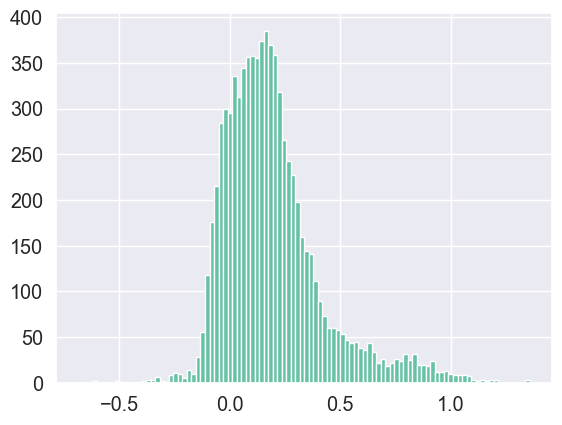

In [1205]:
data["source_attractiveness"].hist(bins=100)

In [1206]:
data['date_of_registration'] = pd.to_datetime(data['date_of_registration'])
data["date_of_registration"] = (pd.Timestamp('2024-10-12')-data["date_of_registration"])/pd.Timedelta(days=365)
data.head(10)

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,4.477617
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,0.230156
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,0.247420
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,0.085218
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,0.379552
5,5505,ecom,3060369.0,0.0,1945683,51293,0,NaN,8.586621,0.640110,2.217238
6,4553,porn,99712.0,0.0,0,0,15178,3725,20.786928,0.063572,1.465106
7,1176,ecom,31677060.0,8760379.0,0,924098,0,8519,8.066347,0.080541,0.645060
8,9356,information_source,NaN,30903.0,0,11154,0,260,5.259169,0.283655,2.724155
9,9772,ecom,1695855.0,0.0,1601683,78271,0,1171,9.834370,0.757402,1.257609


In [1209]:
data.loc[:, 'complaints_count'] = pd.to_numeric(data['complaints_count'].replace('-', np.nan), errors='coerce')
data = data.dropna()
data.head(10)

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
1,2047,information_source,874840.0,21100.0,0,12872,0,0.0,10.721619,-0.022317,0.230156
2,1118,information_source,571210.0,94707.0,0,0,7420,0.0,1.922243,0.046396,0.247420
3,4992,news,89534.0,924.0,0,834,0,0.0,2.149243,-0.093360,0.085218
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948.0,3.764965,0.027303,0.379552
6,4553,porn,99712.0,0.0,0,0,15178,3725.0,20.786928,0.063572,1.465106
7,1176,ecom,31677060.0,8760379.0,0,924098,0,8519.0,8.066347,0.080541,0.645060
9,9772,ecom,1695855.0,0.0,1601683,78271,0,1171.0,9.834370,0.757402,1.257609
10,3492,ecom,1726730.0,1022561.0,548138,14895,18118,3668.0,5.436714,0.476799,1.313496
11,2778,information_source,15538.0,108.0,0,0,4,0.0,9.437733,-0.060626,0.050061
13,1478,news,404294.0,4885.0,0,38365,29907,5523.0,1.915886,0.131784,3.769483


In [1211]:
from sklearn.model_selection import train_test_split

Y = data["source_attractiveness"]
X = data.drop(columns=["source_attractiveness"])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

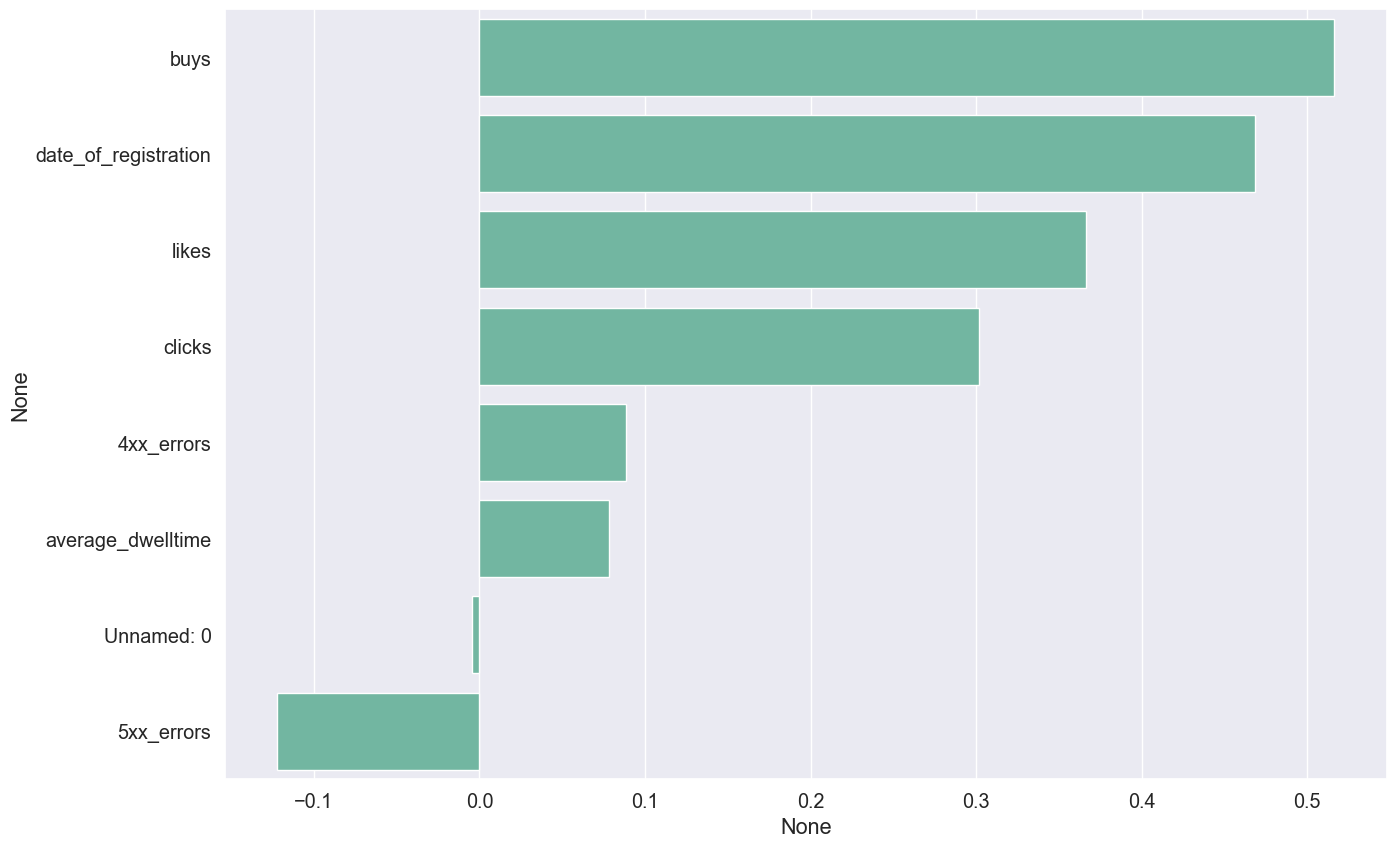

In [1213]:
numeric_data = X_train.select_dtypes([np.number])
numeric_features = numeric_data.columns

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [1214]:
numeric_features

Index(['Unnamed: 0', 'clicks', 'likes', 'buys', '4xx_errors', '5xx_errors',
       'average_dwelltime', 'date_of_registration'],
      dtype='object')

In [1217]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test MSE = %.6f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.6f" % mean_squared_error(y_train, y_train_pred))
model.coef_

Test MSE = 0.020574
Train MSE = 0.023521


array([-6.41110309e-07, -3.92200924e-09,  2.49688581e-08,  5.16955964e-08,
       -2.79501670e-08, -5.92581461e-07,  1.35253953e-03,  5.20381153e-02])

Best alpha = 48.3293


Text(0, 0.5, 'CV score')

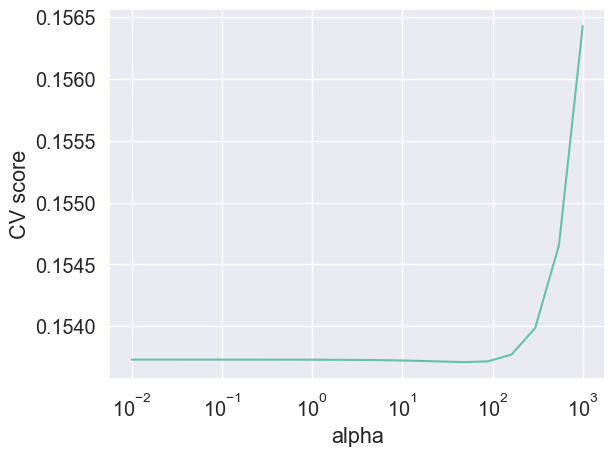

In [1230]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])


alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [1232]:
data["category"].value_counts()

category
information_source    3261
ecom                  1975
news                   658
social                 344
porn                   312
Name: count, dtype: int64

In [1234]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), ["category"]),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

Test MSE = 0.0147
